# Loading the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mlt
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading the dataset

In [2]:
df = pd.read_csv('preprocessed_data.csv')

In [3]:
df.shape

(10681, 14)

In [4]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour,Duration_hours,Duration_mins
0,3,0,5,0,3897,24,3,2019,10,1,20,22,2,50
1,1,3,0,2,7662,1,5,2019,15,13,50,5,7,25
2,4,2,1,2,13882,9,6,2019,25,4,25,9,19,0
3,3,3,0,1,6218,12,5,2019,30,23,5,18,5,25
4,3,0,5,1,13302,1,3,2019,35,21,50,16,4,45


### Splitting the dataset

In [5]:
X = df.drop(['Price'],axis = 1)
y = df.iloc[:,4]

In [6]:
print('X Shape : ', X.shape)
print('y shape : ', y.shape)

X Shape :  (10681, 13)
y shape :  (10681,)


In [7]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [8]:
X_train.head()

,Airline,Source,Destination,Total_Stops,J_Day,J_Month,J_Year,Arrival_min,Arrival_hour,Dep_min,Dep_hour,Duration_hours,Duration_mins
9088,6,2,1,1,9,5,2019,15,19,40,11,7,35
5399,3,1,4,0,21,3,2019,0,14,35,11,2,25
9277,4,3,0,1,9,5,2019,35,23,30,16,7,5
1595,1,2,1,1,18,5,2019,25,9,40,20,12,45
8172,1,3,0,1,24,5,2019,25,20,30,17,26,55


In [9]:
y_train.head()

9088     8266
5399     3858
9277    14781
1595     7480
8172    10623
Name: Price, dtype: int64

# Model Building

## Random Forest Regressor

Random Forest Score on Training data is 0.9537327573381824
Random Forest Score on Test data is 0.785871880245794
[0.75898126 0.7728786  0.81155079 0.81513741 0.75949926]
Accuracy: 78.36 %
Standard Deviation: 2.48 %
Mean Absolute Error: 1226.5586044017207
Mean Squared Error: 4578815.211535587
RMSE(Root Mean Squared Error): 2139.8166303530747
The r2_score is : 0.785871880245794


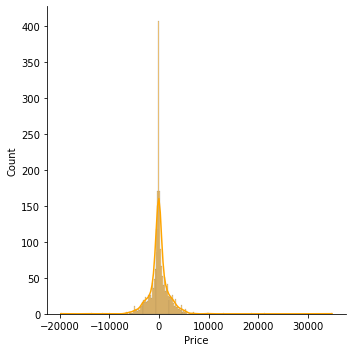

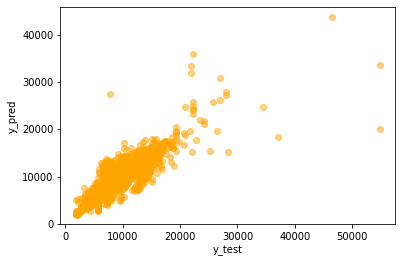

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Random Forest Score on Training data is",model.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test data is",model.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_train, y_train)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Mean Absolute Error:" , mean_absolute_error(y_pred, y_test))

print("Mean Squared Error:" , mean_squared_error(y_pred, y_test))

print('RMSE(Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('The r2_score is :',r2_score(y_test, y_pred))

#sns.set(rc = {'figure.figsize':(10,7)})
#mlt.rcParams['figure.figsize'] = (10,7)
sns.displot(y_test-y_pred, kde = True, color = 'orange');
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5 , color = 'orange')
plt.xlabel("y_test");
plt.ylabel("y_pred");

## Decision Tree Regressor

Decision Tree Regressor Score on Training data is 0.9712434529872721
Decision Tree Regressor Score on Test data is 0.6997487751261683
[0.65043174 0.67424433 0.63458241 0.69046319 0.65653277]
Accuracy: 66.13 %
Standard Deviation: 1.94 %
Mean Absolute Error: 1426.5572531586333
Mean Squared Error: 6420431.269431575
RMSE(Root Mean Squared Error): 2533.8569946687157
The r2_score is : 0.6997487751261683


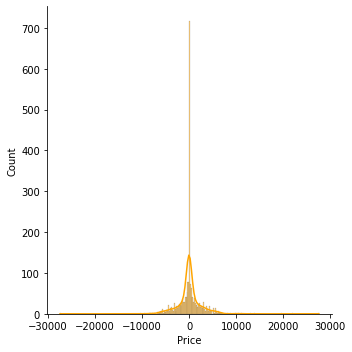

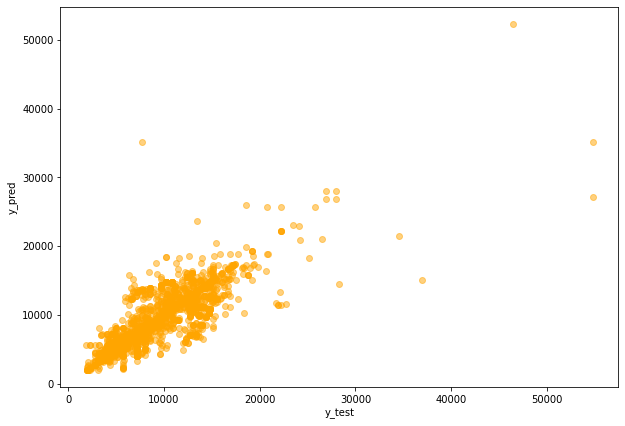

In [11]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("Decision Tree Regressor Score on Training data is",model.score(X_train, y_train))#Training Accuracy
print("Decision Tree Regressor Score on Test data is",model.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_train, y_train)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Mean Absolute Error:" , mean_absolute_error(y_pred, y_test))

print("Mean Squared Error:" , mean_squared_error(y_pred, y_test))

print('RMSE(Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('The r2_score is :',r2_score(y_test, y_pred))

#sns.set(rc = {'figure.figsize':(10,7)})
mlt.rcParams['figure.figsize'] = (10,7)
sns.displot(y_test-y_pred, kde = True, color = 'orange');
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5 , color = 'orange')
plt.xlabel("y_test");
plt.ylabel("y_pred");

## K Nearest Neighbours

K Nearest Neighbours Score on Training data is 0.7579213499006054
K Nearest Neighbours Score on Test data is 0.5811738669455815
[0.63147848 0.55199851 0.55088132 0.59685234 0.55157296]
Accuracy: 57.66 %
Standard Deviation: 3.26 %
Mean Absolute Error: 1788.328310715957
Mean Squared Error: 8955981.452690689
RMSE(Root Mean Squared Error): 2992.654582923109
The r2_score is : 0.5811738669455815


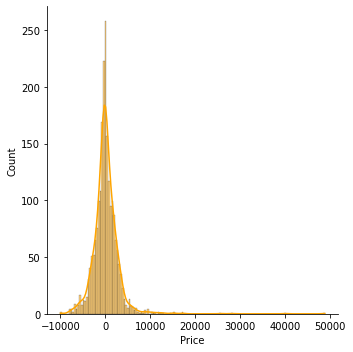

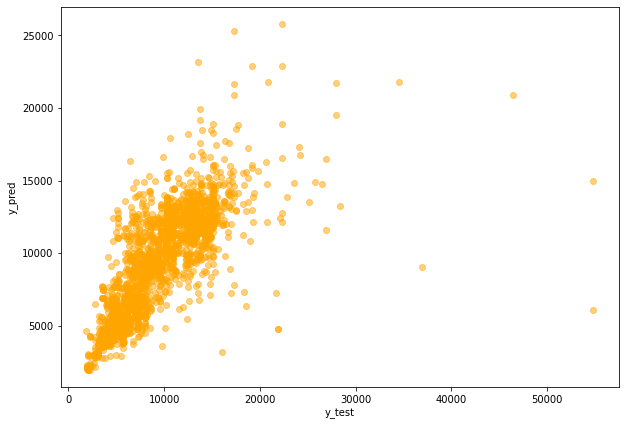

In [12]:
model =KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("K Nearest Neighbours Score on Training data is",model.score(X_train, y_train))#Training Accuracy
print("K Nearest Neighbours Score on Test data is",model.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_train, y_train)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Mean Absolute Error:" , mean_absolute_error(y_pred, y_test))

print("Mean Squared Error:" , mean_squared_error(y_pred, y_test))

print('RMSE(Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('The r2_score is :',r2_score(y_test, y_pred))

#sns.set(rc = {'figure.figsize':(10,7)})
mlt.rcParams['figure.figsize'] = (10,7)
sns.displot(y_test-y_pred, kde = True, color = 'orange');
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5 , color = 'orange')
plt.xlabel("y_test");
plt.ylabel("y_pred");

### Feature Scaling

In [13]:
scaler = preprocessing.StandardScaler()

X_scaler = scaler.fit_transform(X_train)
X_scaler_test = scaler.transform(X_test)

## Linear Regression

In [14]:
model =LinearRegression()
model.fit(X_scaler, y_train)
y_pred=model.predict(X_scaler_test)

print("Linear Regression Score on Training data is",model.score(X_scaler, y_train))#Training Accuracy
print("Linear Regression Score on Test data is",model.score(X_scaler_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_scaler, y_train)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Mean Absolute Error:" , mean_absolute_error(y_pred, y_test))

print("Mean Squared Error:" , mean_squared_error(y_pred, y_test))

print('RMSE(Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('The r2_score is :',r2_score(y_test, y_pred))

Linear Regression Score on Training data is 0.43659990111221747
Linear Regression Score on Test data is 0.44166714605093405
[0.46583604 0.42078185 0.44886286 0.46193897 0.38867646]
Accuracy: 43.72 %
Standard Deviation: 2.90 %
Mean Absolute Error: 2429.6065183412675
Mean Squared Error: 11939127.694656016
RMSE(Root Mean Squared Error): 3455.304283946063
The r2_score is : 0.44166714605093405


## XG Boost Regressor

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XG Boost Regressor Score on Training data is 0.9367417368542721
XG Boost Regressor Score on Test data is 0.8232985806751316


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262

[0.81179717 0.82779886 0.81704279 0.84353415 0.81447056]
Accuracy: 82.29 %
Standard Deviation: 1.16 %
Mean Absolute Error: 1166.3784201965188
Mean Squared Error: 3778500.21582111
RMSE(Root Mean Squared Error): 1943.8364683843931
The r2_score is : 0.8232985806751316


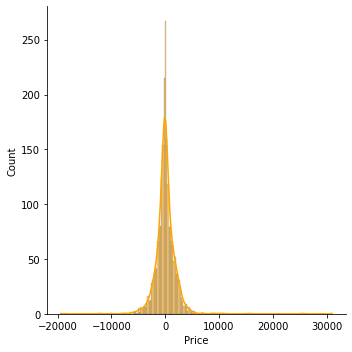

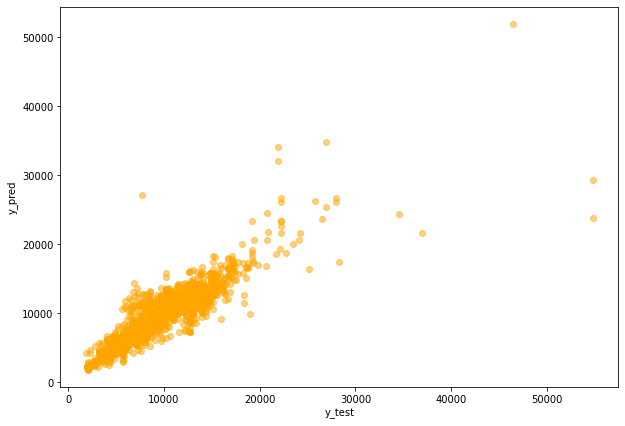

In [15]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

print("XG Boost Regressor Score on Training data is",model.score(X_train, y_train))#Training Accuracy
print("XG Boost Regressor Score on Test data is",model.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(model, X_train, y_train)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print("Mean Absolute Error:" , mean_absolute_error(y_pred, y_test))

print("Mean Squared Error:" , mean_squared_error(y_pred, y_test))

print('RMSE(Root Mean Squared Error):', np.sqrt(mean_squared_error(y_test, y_pred)))

print('The r2_score is :',r2_score(y_test, y_pred))

#sns.set(rc = {'figure.figsize':(10,7)})
mlt.rcParams['figure.figsize'] = (10,7)
sns.displot(y_test-y_pred, kde = True, color = 'orange');
plt.show()
plt.scatter(y_test, y_pred, alpha = 0.5 , color = 'orange')
plt.xlabel("y_test");
plt.ylabel("y_pred");

## Model Selection

#### We can observe that XG Boost Regressor yeilds the highest accuracy. So we will choose XG Boost Regressor as our final model.

# Saving the model

In [21]:
import pickle
file = open('flight_prediction.pkl','wb')

pickle.dump(model,file)
file.flush()

In [22]:
xgb = pickle.load(open('flight_prediction.pkl','rb'))

In [23]:
y_predict = xgb.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [24]:
r2_score(y_test, y_predict)

0.8232985806751316